# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
api_key_2 = "19c1aa79b8f8293f4748e39baf8ea14d"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key_2
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key_2}&units={units}&q="


cityname=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspeed=[]

count=1

for city in cities:
    try:
        city = city.replace(" ", "%20")
        response = requests.get(query_url + city).json()
        cityname.append(response["name"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        citycounter=response["name"]
        print(f"Processing Record number {count} | {citycounter}")
        count=count+1
        time.sleep(1)
    except:
        print ("City not found. Skipping...")

Processing Record number 1 | Barrow
Processing Record number 2 | Hermanus
Processing Record number 3 | Lavrentiya
Processing Record number 4 | Hobart
Processing Record number 5 | Road Town
Processing Record number 6 | Qaanaaq
Processing Record number 7 | Mehamn
Processing Record number 8 | Codrington
Processing Record number 9 | Tasiilaq
Processing Record number 10 | Acapulco
Processing Record number 11 | Hithadhoo
Processing Record number 12 | Bolu
Processing Record number 13 | Beloha
Processing Record number 14 | Wajid
City not found. Skipping...
Processing Record number 15 | Fonte Boa
Processing Record number 16 | Norden
Processing Record number 17 | Thompson
Processing Record number 18 | Babu
Processing Record number 19 | Bredasdorp
Processing Record number 20 | Ushuaia
Processing Record number 21 | Maralal
Processing Record number 22 | Bell Ville
Processing Record number 23 | Vardo
Processing Record number 24 | Christchurch
Processing Record number 25 | Saskylakh
Processing Record

Processing Record number 194 | Marsaxlokk
Processing Record number 195 | Baruun-Urt
Processing Record number 196 | Corinto
Processing Record number 197 | Jinchang
Processing Record number 198 | Vila Velha
Processing Record number 199 | Phan Thiet
Processing Record number 200 | Kloulklubed
Processing Record number 201 | Namatanai
Processing Record number 202 | Bima
Processing Record number 203 | Venado Tuerto
City not found. Skipping...
Processing Record number 204 | Bud
Processing Record number 205 | Mugur-Aksy
City not found. Skipping...
Processing Record number 206 | Mubi
Processing Record number 207 | Kahului
Processing Record number 208 | Vanavara
Processing Record number 209 | Leningradskiy
City not found. Skipping...
Processing Record number 210 | Oga
Processing Record number 211 | Yeppoon
Processing Record number 212 | Saint-Philippe
City not found. Skipping...
Processing Record number 213 | Daru
Processing Record number 214 | Jadu
Processing Record number 215 | Chokurdakh
City 

Processing Record number 376 | Lerwick
Processing Record number 377 | San Andres
Processing Record number 378 | Jieshi
Processing Record number 379 | Palu
Processing Record number 380 | Waitati
Processing Record number 381 | Garowe
Processing Record number 382 | Mudgee
Processing Record number 383 | Touros
Processing Record number 384 | Pervomayskoye
Processing Record number 385 | Tchollire
Processing Record number 386 | Richards Bay
Processing Record number 387 | Saint-Pierre
Processing Record number 388 | Esperance
Processing Record number 389 | Prabumulih
Processing Record number 390 | Badiraguato
Processing Record number 391 | Dabra
Processing Record number 392 | Marovoay
Processing Record number 393 | Rawson
Processing Record number 394 | Sao Felix do Xingu
Processing Record number 395 | Norman Wells
Processing Record number 396 | Suluq
Processing Record number 397 | Raudeberg
City not found. Skipping...
Processing Record number 398 | Melnikovo
Processing Record number 399 | San J

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
base_df={ "City": cityname,
"Cloudiness": cloudiness,
"Country": country,
"Date": date,
"Humidity": humidity,
"Lat": lat,
"Lng": lng,
"Max Temp": maxtemp,
"Wind Speed": windspeed}

df=pd.DataFrame(base_df)

df.to_csv('WeatherPydf.csv')

df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [73]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,68,AR,1566696747,79,-38.31,-60.23,53.22,14.47
1,Hermanus,1,ZA,1566696749,86,-34.42,19.24,55.99,4.00
2,Lavrentiya,61,RU,1566696750,51,65.58,-170.99,58.89,9.60
3,Hobart,75,AU,1566696751,50,-42.88,147.33,51.80,13.87
4,Road Town,20,VG,1566696572,79,18.42,-64.62,84.20,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

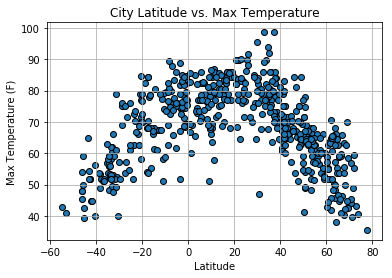

In [91]:
plt.scatter(df["Lat"], df["Max Temp"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

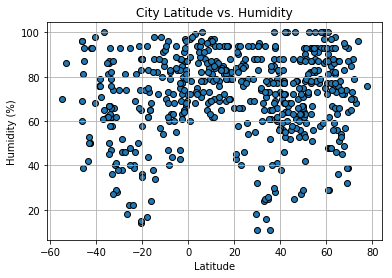

In [94]:
plt.scatter(df["Lat"], df["Humidity"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

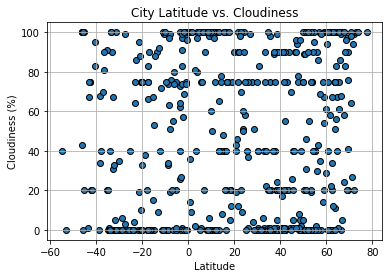

In [96]:
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

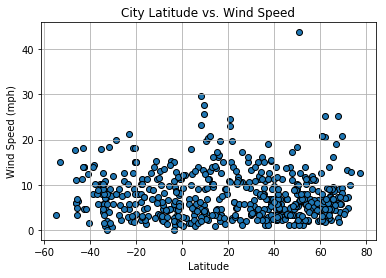

In [98]:
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_WindSpeed.png")
plt.show()